In [6]:
import numpy
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [7]:
grad = [[1,1,0],[-1,1,0],[1,-1,0],[-1,-1,0],
[1,0,1],[-1,0,1],[1,0,-1],[-1,0,-1],
[0,1,1],[0,-1,1],[0,1,-1],[0,-1,-1]]

In [14]:
permutation = [151,160,137,91,90,15,
   131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,
   190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,
   88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,
   77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,
   102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,
   135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,
   5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,
   223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,
   129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,
   251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,
   49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,
   138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180]
# print(len(permutation))
p = [None] * 512
for i in range(256):
    p[256+i] = p[i] = permutation[i]
repeatat = 255

In [15]:
def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(t, a, b):
    return a + t*( b-a )

In [16]:
def grad3D(hash, X):
    h = hash & 15
    u = X.x if h < 8 else X.y
    v = X.y if h < 4 else (X.x if h in (12, 14) else X.z)
    return (u if (h&1) == 0 else -u) + (v if (h&2) == 0 else -v)

def grad2D(hash, X):
    h = hash & 15
    u = X.x if h < 4 or h in (12, 15) else -X.x
    v = X.y if h < 8 else -X.y
    return u+v

In [17]:
class Point:
    def __init__(self, x, y, z=None, repeat=255):
        self.x = x%repeat
        self.y = y%repeat
        if z is not None:
            self.z = z%repeat
        else:
            self.z = None
        self.vector = None
        self.unit_vector = None
        self.floor = None
        self.faded = None

    def get_unit_vector(self):
        if self.z is None:
            self.unit_vector = numpy.array([self.x%1, self.y%1])
        else:
            self.unit_vector = numpy.array([self.x%1, self.y%1, self.z%1]);
        return self.unit_vector

    def get_vector(self):
        if self.z is not None:
            self.vector = numpy.array([self.x, self.y, self.z])
        else :
            self.vector = numpy.array([self.x, self.y])
        return self.vector

    def put_vector(self):
        if self.vector is None:
            print("Vector hasn't been assigned yet...\nFirst assign the vector using <Point Object>.get_vector()")
            return None;
        if self.z is None :
            print("[ %d , %d ]" % (self.vector[0], self.vector[1]))
        else :
            print("[ %d , %d , %d]" % (self.vector[0], self.vector[1], self.vector[2]))
            return None
    
    def get_floor_vector(self):
        if self.z is not None:
            self.floor = numpy.array([math.floor(self.x),
             math.floor(self.y), math.floor(self.z)]);
        else :
            self.floor = numpy.array([math.floor(self.x),
             math.floor(self.y)])
        return self.floor

    def put_floor_vector(self):
        if self.floor is None :
            print("floor vector is None...\nFirst assign floor vector using <Point Object>.get_floor_vector()")
            return None
        if self.z is None :
            print("[ %d , %d ]" % (self.floor[0], self.floor[1]))
        else :
            print("[ %d , %d , %d]" % (self.floor[0], self.floor[1], self.floor[2]))
        return None

    def get_faded_vector(self):
        if self.unit_vector is None:
            pritn("unit vector not assigned, found None...")
            return None
        if self.z is None :
            self.faded = numpy.array([fade(self.unit_vector[0]), fade(self.unit_vector[1])] )
        else :
            self.faded = numpy.array( [fade(self.unit_vector[0]), fade(self.unit_vector[1]), fade(self.unit_vector[2])] )  
        return self.faded
    
    def put_faded_vector(self):
        if self.faded is None:
            print("faded vector is not assigned...")
            return None
        if self.z is None :
            print("[ %f, %f ]" %(self.faded[0], self.faded[1]))
        else :
            print("[ %1.6f, %1.6f, %1.6f ]" %(self.faded[0], self.faded[1], self.faded[2]))
        return None

In [46]:
def perlin2D(point):
    [X, Y] = point.get_vector()
    [x, y] = point.get_unit_vector()
    [u, v] = point.get_faded_vector()
    A = int(p[int(X)] + Y)
    AB = int(p[int(A)+1] + Y)
    B = int(p[int(X)+1] + Y)
    BA = int(p[int(B)+1] + Y)
    return lerp(v, lerp(u, grad2D(p[A], Point(x  , y)  ),
                           grad2D(p[A], Point(x-1, y)  )), 
                   lerp(u, grad2D(p[B], Point(x  , y-1)),
                           grad2D(p[B], Point(x-1, y-1)))
                )


In [47]:
X = Point(1.1231, 2.12312)
X.get_vector()
X.get_floor_vector()
print(perlin2D(X))

-8.0606406439728


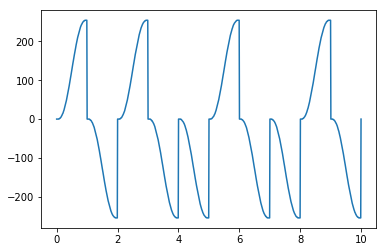

In [48]:
x = numpy.linspace(0, 10, 1000);
y = numpy.full(1000, 0);
for i in range(1000):
    y[i] += perlin2D(Point(x[i], y[i]));

plt.plot(x, y);
plt.show()